#### Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Read dataset and create a dataframe

In [3]:
customer_churn = pd.read_csv('customer_churn.csv')

### Data Understanding

In [4]:
customer_churn.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dataset & Columns Count

In [5]:
customer_churn.shape

(7043, 21)

#### Dataset Info

In [6]:
customer_churn.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Check for duplicates

In [8]:
customer_churn.duplicated().sum()

0

#### Check for missing values

In [9]:
customer_churn.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Calculate Tenure

In [10]:
# Convert start_date and end_date to datetime
# customer_churn['start_date'] = pd.to_datetime(customer_churn['start_date'])
# customer_churn['end_date'] = pd.to_datetime(customer_churn['end_date'])

# current_date = pd.to_datetime('today')
# customer_churn['Tenure'] = customer_churn.apply(
#     lambda row: ((row['end_date'] if pd.notnull(row['end_date']) else current_date) - row['start_date']).days / 30.44,
#     axis=1
# )

#### Add NPS and assign dummy data

In [11]:
np.random.seed(42)
customer_churn['NPS'] = np.random.randint(60, 101, size=len(customer_churn))

In [12]:
customer_churn.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NPS
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,98
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,88
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,74
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,67
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,80


#### Summary of the central tendency, dispersion, and shape of a dataset’s distribution

In [13]:
stats_def = {
    'Statistic': ['Count', 'Mead', 'STD', 'Min', '25%', '50%', '75%', 'Max'],
    'Description': [
        'The number of non-null entries.',
        'The average (mean) value.',
        'The standard deviation.',
        'The minimum value.',
        'The 25th percentile (first quartile).',
        'The 50th percentile (median or second quartile).',
        'The 75th percentile (third quartile).',
        'The maximum value.'
    ]
}

df_stats_def = pd.DataFrame(stats_def)
df_stats_def

,Statistic,Description
0,Count,The number of non-null entries.
1,Mead,The average (mean) value.
2,STD,The standard deviation.
3,Min,The minimum value.
4,25%,The 25th percentile (first quartile).
5,50%,The 50th percentile (median or second quartile).
6,75%,The 75th percentile (third quartile).
7,Max,The maximum value.


In [14]:
customer_churn.describe()

,SeniorCitizen,Tenure,MonthlyCharges,NPS
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,80.072980
std,0.368612,24.559481,30.090047,11.720573
min,0.000000,0.000000,18.250000,60.000000
25%,0.000000,9.000000,35.500000,70.000000
50%,0.000000,29.000000,70.350000,80.000000
75%,0.000000,55.000000,89.850000,90.000000
max,1.000000,72.000000,118.750000,100.000000


### Data Visualization

#### Distribution of Customer Churn Count

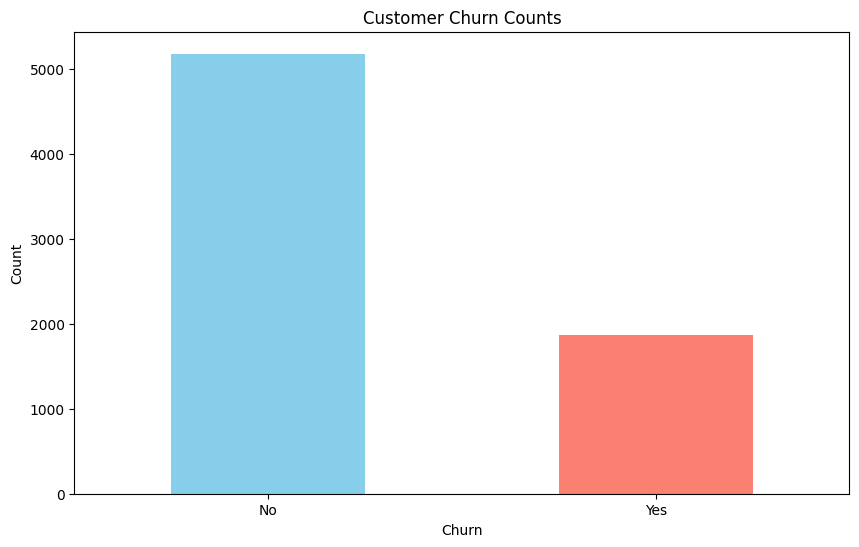

In [15]:
# Count the occurrences of each unique value in the 'Churn' column
churn_counts = customer_churn['Churn'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Distribution of Tenure

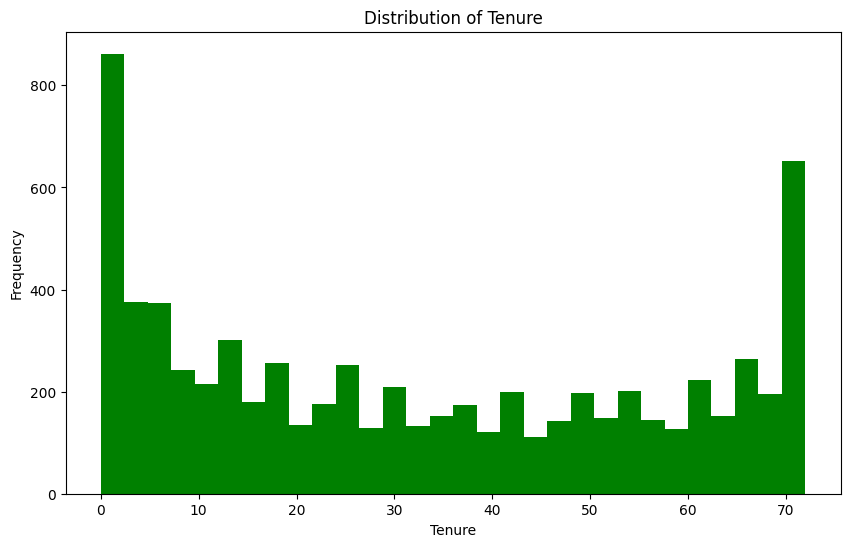

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(customer_churn['Tenure'], bins=30, color="green")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

### Linear Regression

   CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0          

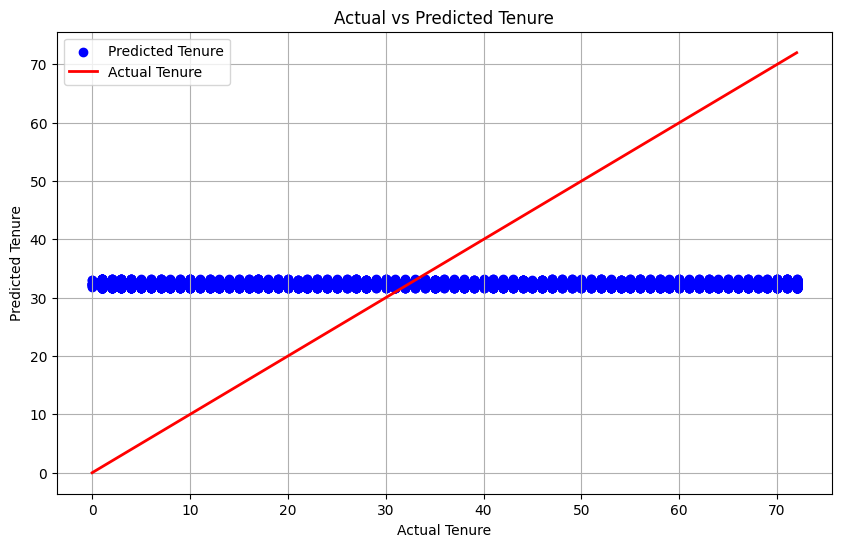

In [17]:
# Define features and target variable
X = customer_churn[['NPS']]
y = customer_churn['Tenure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast the tenure of each customer in the dataset
customer_churn['Predicted_Tenure'] = model.predict(X)

# Display the first few rows to confirm the addition of the Predicted_Tenure field
print(customer_churn.head())

# Plot the actual vs predicted tenure
plt.figure(figsize=(10, 6))
plt.scatter(customer_churn['Tenure'], customer_churn['Predicted_Tenure'], color='blue', label='Predicted Tenure')
plt.plot([customer_churn['Tenure'].min(), customer_churn['Tenure'].max()], 
         [customer_churn['Tenure'].min(), customer_churn['Tenure'].max()], color='red', linewidth=2, label='Actual Tenure')
plt.xlabel('Actual Tenure')
plt.ylabel('Predicted Tenure')
plt.title('Actual vs Predicted Tenure')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Predict the tenure for the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value (R²)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 22.471618544052713
Mean Squared Error (MSE): 629.003617439913
R-squared (R²): 0.0009377243473941421


In [19]:
customer_churn.to_csv('lin_reg_customer_churn.csv', index=False)
customer_churn

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NPS,Predicted_Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,98,31.699419
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,88,32.076197
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,74,32.603686
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,67,32.867431
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,80,32.377619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,89,32.038519
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,72,32.679042
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,100,31.624063
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,75,32.566008
